In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
case = pd.read_csv('0.dataSet/kr_regional_daily2.csv')

In [3]:
print(case.shape)
case.head()

(1260, 6)


date region  confirmed  death  released  vaccinatedOnce
0  2021-01-01     서울      19356    182     10787             NaN
1  2021-01-01     부산       1925     50      1370             NaN
2  2021-01-01     대구       7844    201      7294             NaN
3  2021-01-01     인천       2904     29      2150             NaN
4  2021-01-01     광주       1098      6       864             NaN

In [4]:
df = case[['date', 'region', 'confirmed']]

In [5]:
df.dtypes

date         object
region       object
confirmed     int64
dtype: object

In [6]:
df.shape

(1260, 3)

In [7]:
df = df.pivot(index='region', columns='date', values='confirmed')
df = df.reset_index()

for p in range(2):
   i = 0
   while i < len(df.columns):
       try:
           a = np.array(df.iloc[:, i + 1])
           b = np.array(df.iloc[:, i + 2])
           c = (a + b) / 2
           df.insert(i+2, str(df.iloc[:, i + 1].name) + '^' + str(len(df.columns)), c)
       except:
           print(f"\n  Interpolation No. {p + 1} done...")
       i += 2


  Interpolation No. 1 done...

  Interpolation No. 2 done...


In [8]:
df = case[['date', 'region', 'confirmed']]

In [9]:
df.head()

date region  confirmed
0  2021-01-01     서울      19356
1  2021-01-01     부산       1925
2  2021-01-01     대구       7844
3  2021-01-01     인천       2904
4  2021-01-01     광주       1098

In [10]:
df.columns = ['date', 'region', 'value']

In [11]:
#df = pd.melt(df, id_vars = 'province', var_name = 'date')

In [12]:
fnames_list = df['date'].unique().tolist()

In [13]:
def random_color_generator(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

In [14]:
province_list = df['region'].unique().tolist()

In [15]:
colors = dict(zip(province_list, random_color_generator(len(province_list))))

In [16]:
num_of_elements = 10

In [17]:
import matplotlib.colors as mc
import colorsys
from random import randint

In [18]:
def transform_color(color, amount = 0.5):

    try:
        c = mc.cnames[color]
    except:
        c = color
        c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

random_hex_colors = []
for i in range(len(province_list)):
    random_hex_colors.append('#' + '%06X' % randint(0, 0xFFFFFF))

rgb_colors = [transform_color(i, 1) for i in random_hex_colors]
rgb_colors_opacity = [rgb_colors[x] + (0.825,) for x in range(len(rgb_colors))]
rgb_colors_dark = [transform_color(i, 1.12) for i in random_hex_colors]

In [19]:
normal_colors = dict(zip(province_list, rgb_colors_opacity))
dark_colors = dict(zip(province_list, rgb_colors_dark))

In [20]:
import re

In [21]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.3.2
설치 위치:  C:\Users\Playdata\anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\Playdata\.matplotlib
캐시 위치:  C:\Users\Playdata\.matplotlib


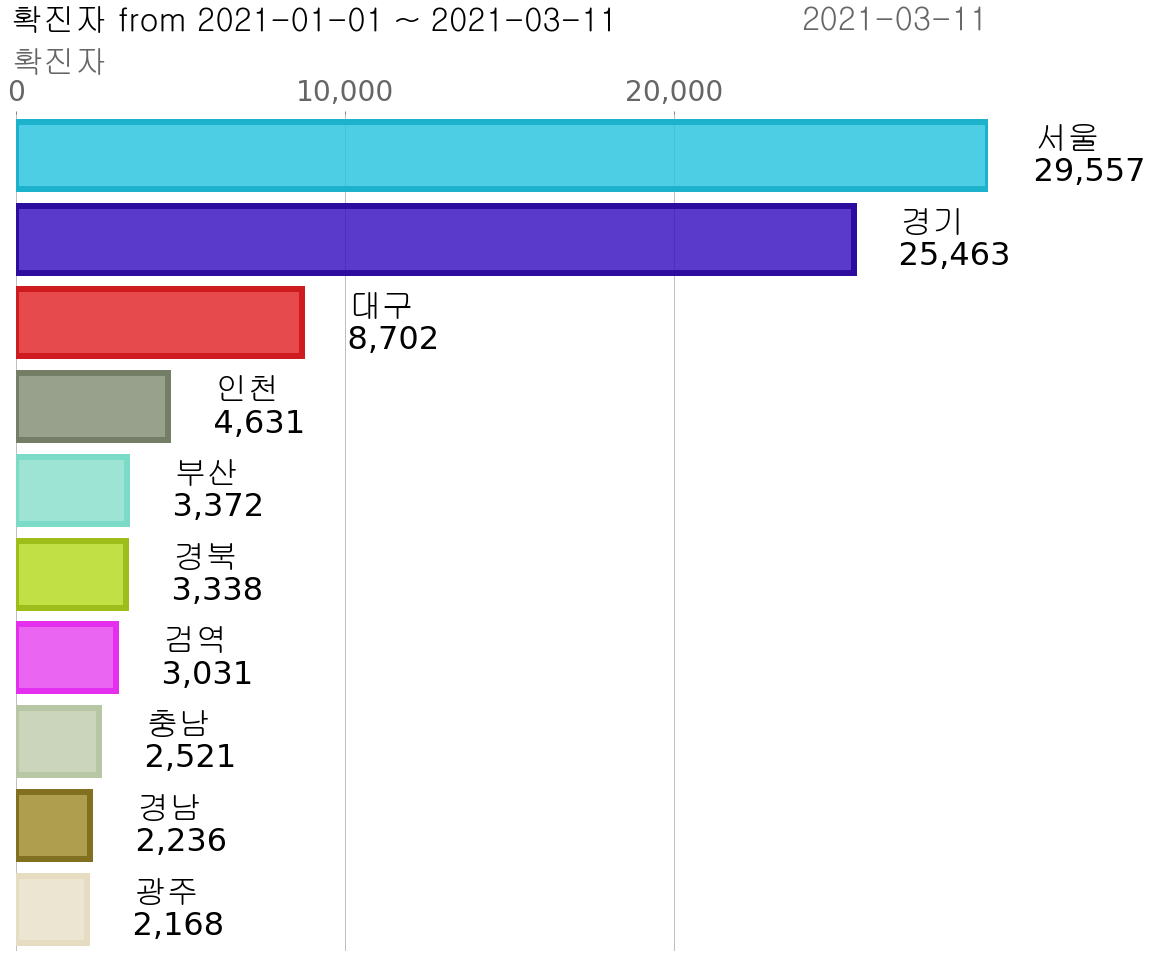

In [26]:
fig, ax = plt.subplots(figsize = (20, 15))

def draw_barchart(current_date):
    dff = df[df['date'].eq(current_date)].sort_values(by='value', ascending=True).tail(num_of_elements)
    ax.clear()
    
    ax.barh(dff['region'], dff['value'], color=[normal_colors[p] for p in dff['region']],
                edgecolor =([dark_colors[x] for x in dff['region']]), linewidth = '6')
    dx = dff['value'].max() / 200


    for i, (value, name) in enumerate(zip(dff['value'], dff['region'])):
        ax.text(value + dx, 
                i + (num_of_elements / 50), '    ' + name,
                size = 32,
                ha = 'left',
                va = 'center',
                 fontdict = {'fontname': 'Gulim'})

        ax.text(value + dx,
                i - (num_of_elements / 50), 
                f'    {value:,.0f}', 
                size = 32, 
                ha = 'left', 
                va = 'center')

    time_unit_displayed = re.sub(r'\^(.*)', r'', str(current_date))
    ax.text(1.0, 
            1.1, 
            time_unit_displayed,
            transform = ax.transAxes, 
            color = '#666666',
            size = 32,
            ha = 'right', 
            weight = 'bold', 
             fontdict = {'fontname': 'Gulim'})

    ax.text(-0.005, 
            1.05, 
            '확진자', 
            transform = ax.transAxes, 
            size = 32, 
            color = '#666666',
               fontdict = {'fontname': 'Gulim'})

    ax.text(-0.005, 
            1.1, 
            '확진자 from 2021-01-01 ~ 2021-03-11', 
            transform = ax.transAxes,
            size = 32, 
            weight = 'bold', 
            ha = 'left',
               fontdict = {'fontname': 'Gulim'})

    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis = 'x', colors = '#666666', labelsize = 28)
    ax.set_yticks([])
    ax.set_axisbelow(True)
    ax.margins(0, 0.01)
    ax.grid(which = 'major', axis = 'x', linestyle = '-')

    plt.locator_params(axis = 'x', nbins = 4)
    plt.box(False)
    plt.subplots_adjust(left = 0.075, right = 0.75, top = 0.825, bottom = 0.05, wspace = 0.2, hspace = 0.2)
    
    plt.box(False)    
draw_barchart('2021-03-11')


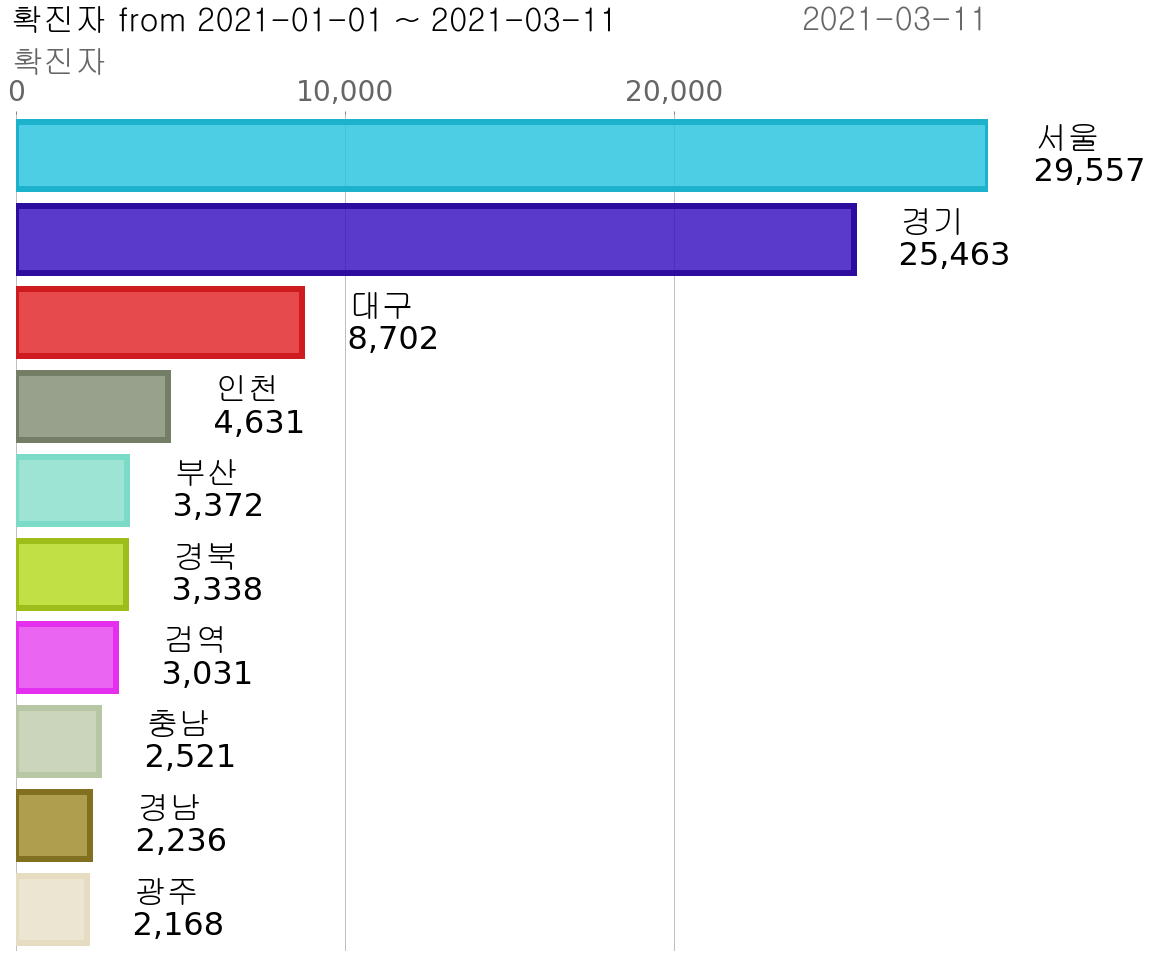

In [27]:
fig, ax = plt.subplots(figsize = (20, 15))
animator = animation.FuncAnimation(fig, draw_barchart, frames=fnames_list)
HTML(animator.to_jshtml())